In [38]:
import skimage.util as util
import skimage.io as io
import numpy as np
import os as os
from PIL import Image
import matplotlib.pyplot as plt
from skimage import filters,transform

from skimage.color import rgb2gray


# You can import other modules as needed.

In [39]:
def segleaf(img):
    '''
    Segment a leaf image.,
    :param I: Color leaf image to segment., 
    return: Logical image where True pixels represent foreground (i.e. leaf pixels).
    '''
    I_gray=rgb2gray(img)
    r,g,b=img[:,:,0],img[:,:,1],img[:,:,2]
    ir,ig,ib=np.invert(r),np.invert(g),np.invert(b)
    
   
    val=0
    
    # CORE VALUE OF THIS METHOD IS HERE WHERE I DECIDED TO USE R, COZ EXPERIMENTATION SHOWED ME R CHANNEL WORKS BEST 
    I=r
    
    # COMPUTRE T-RANGE TRIAL AND ERROR GET 50 TO 200
    
    I_unique = np.unique(I)
    T_ = I_unique[I_unique<200]    
    T_range=T_[T_>50]

    MAX_T=0
    
    # here find appropirate thresholf
    for i in [50,100]:
        T=i
        temp=I   
        wf=np.count_nonzero(temp>i)/np.count_nonzero(I)
        wb=np.count_nonzero(temp<i)/np.count_nonzero(I)
        ub = np.sum(temp<i)/np.sum(I)
        uf = np.sum(temp>i)/np.sum(I)        
        cur=wb*wf*(abs(ub-uf))      # HERE ABS IS is used  :)
        
        if cur > val:
            val = cur
            MAX_T=i
    T=MAX_T
    
    # AT THIS POINT THRESHHOLD IS OBTAINED
            
    segmented = I<T
    
    segmented=filters.median(segmented)
    segmented=filters.median(segmented)
    segmented=filters.median(segmented)
    
    
    
    # REGION PROCESSING .... OUTPUT IS BINARY IMAGE
    
    segmented=(np.multiply(( np.invert(g>r) !=(ir>T)),ir>T) *((ir>T) > (r<b))) != (b==T)
    
    return segmented

# Step 2: Implment Measures

Write functions to compute the Dice Similarity Coefficient (DSC) measure of segmentation quality.  

In [40]:
def dsc(img,ground_img):
    
    img=np.array(img)
    ground_img=np.array(ground_img)

            
    denominator1=np.count_nonzero(img)
    denominator2=np.count_nonzero(ground_img)   
    
    overlap = np.multiply(img,ground_img) 
    
    overlap=np.count_nonzero(overlap)
    den=(denominator1+denominator2)
    

    return 2*overlap/den



# Step 3: Write a Validation driver program.

Write code that segments each image, and computes the DSC for each segmentation.  Print the DSC of each segmentation as you perform it.  At the end, print the average and standard deviation of the DSC over all of the images.  Also print the percentage of regions that were "recognized" (see below).  Sample output is in the assignment description document.

The general approach should be, for each input image (in the `images` folder):

* load the image and it's ground truth
* segment the input image - this should be a binary image with a single region (connected component).
* Compute the DSC from the segmented image and the ground truth image (using the function from Step 2).
* Determine whether the leaf was "recognized" (a leaf is recognized if it's DSC is greater than 0.6).
* DSC to the console (see sample output).

When finished, don't forget to print the average and standard deviation of the DSC for all images, and the percentage of images where the leaf was "recognized".

_Feel free to define additional helper functions for your program if you think it will help._

In [41]:
#### Validate ####
# Paths for folders -- original and ground truth images
images_path = os.path.join('original', 'images')
gt_path = os.path.join('segmented', 'groundtruth')

dsc_values={}
std_={}

# Iterate over all files in the original images folder
for root, dirs, files in os.walk(images_path):
    
    for filename in files:
        # ignore files that are not PNG files.
        if filename[-4:] != '.png':
            continue

        image_=io.imread(root+'/'+filename)
        segmented_=segleaf(image_)
        
        ground=io.imread(gt_path+'/'+'thresh'+filename)
        
        dsc_values[filename]=dsc(segmented_,ground)
        std_[filename] = np.std(segmented_)
       
          
#         concatenate variable root with filename to get the path to an input file.

In [42]:
mean=sum(dsc_values.values())/len(dsc_values.values())
print("Mean of all is :",mean)
recognized=0
for key in dsc_values:    
    if dsc_values[key] > 0.6:
        recognized+=1
    print("DSC for image", key, " : ", dsc_values[key]*100, "%", "its STD", std_[key])
        

Mean of all is : 0.8202102593323174
DSC for image image_0161.png  :  76.64612962761915 % its STD 0.36847677821438496
DSC for image image_0163.png  :  92.01506557480201 % its STD 0.2963555050684553
DSC for image image_0078.png  :  74.09844913011867 % its STD 0.30338801025230944
DSC for image image_0018.png  :  67.61867235907184 % its STD 0.4527989467891254
DSC for image image_0099.png  :  71.22765564002465 % its STD 0.42191465912372234
DSC for image image_0110.png  :  73.30000960381957 % its STD 0.43868753904876057
DSC for image image_0174.png  :  64.04875496321833 % its STD 0.4059895517021997
DSC for image image_0080.png  :  98.65677626303128 % its STD 0.3897422628491056
DSC for image image_0132.png  :  58.22312648355374 % its STD 0.4259694796592703
DSC for image image_0113.png  :  92.22578012180574 % its STD 0.36711039215512364
DSC for image image_0160.png  :  82.62749717375665 % its STD 0.34099453681616504
DSC for image image_0175.png  :  65.83649726566581 % its STD 0.412767363739611

# Step 4:  Display Examples

Choose one input image where your algoirthm performed very well.  Choose another image where the algorithm did not perform well.  Display the two original images with the segmentation superimposed on top. Also display the same two image's ground truth with the segmentation superimposed on top. Title the images to indicate which is the "good" example, and which is the "bad" example.


In [43]:
 d = {'320': 1, '321': 0, '322': 3}
min(d, key=d.get)

'321'

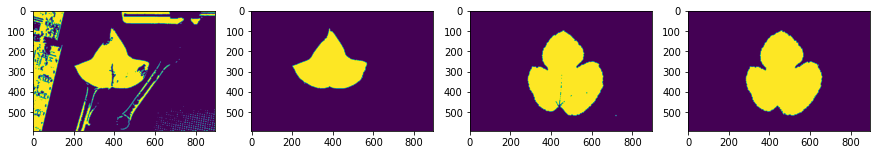

In [44]:
import matplotlib.pyplot as plt

# % matplotlib inline

worst=min(dsc_values, key=dsc_values.get)
best=max(dsc_values, key=dsc_values.get)


worst_=io.imread('original/images/' +worst)
ground_worst=io.imread('segmented/groundtruth/thresh'+worst)


best_=io.imread('original/images/'+best)
ground_best=io.imread('segmented/groundtruth/thresh'+best)



fig, ax = plt.subplots(1,4,figsize=(15,15))

ax[0].imshow(segleaf(worst_));
ax[1].imshow(ground_worst);


ax[2].imshow(segleaf(best_));
ax[3].imshow(ground_best);


# Step 5: A time for reflection.

### Answer the following questions right here in this block.

1. In a few sentences, briefly explain what your segmentation algorithm from Step 1 does and how it works.  

	_Your answer:_  the algorithm is is based on a simple threshhold. It TAKES AN INPUT IMAGE AND  finds a threshhold and applies it on a single channel (THE RED CHANNEL WHICH CONTRASTS THE GREEN WELL)... median filter hepled..more was better but its get messy

2. Consider your good result.  What, if anything, about your algoirthm is preventing you from getting a better result with this image?  If you weren't able to get any results, leave this blank, or explain what was preventing you from getting a result.

	_Your answer:_  

3. Consider your bad result.  What is it about your algoirthm caused the poor performance?   If you weren't able to get any results, leave this blank. 

	_Your answer:_
